# Lab1

# Reading CSV

In [13]:
import pandas as pd
import graphviz

df = pd.read_csv("Downloads/Datasets-UCI/Datasets-UCI/15_monks-problems-2.csv", delimiter=";")
df.head(15)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,label
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,0
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,0
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,0
5,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0
6,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0
7,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,0
8,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0
9,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0


# Splitting

In [14]:
from sklearn.model_selection import train_test_split

y = df['label']
X = df.filter(like='att')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Decision Tree Classifier and Accuracy Score

In [15]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score

# Matplotlib

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

depth = list(range(1,18))
error_train = []
error_test = []

for i in depth:
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    train_score=clf.score(X_train,y_train)
    error_train.append((1-train_score)*100)
    test_score=accuracy_score(y_test,y_pred)
    error_test.append((1-test_score)*100)

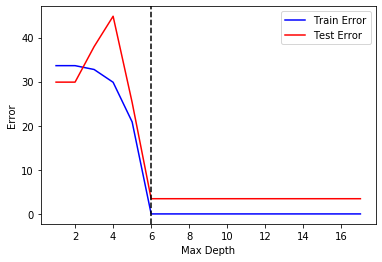

In [17]:
plt.plot(depth, error_train,'b')
plt.plot(depth, error_test,'r')
plt.axvline(x=6,linestyle='--',color='k')
plt.ylabel('Error')
plt.xlabel('Max Depth')
plt.legend(["Train Error", "Test Error"], loc ="upper right") 
plt.show()

# Graphviz

In [18]:
new_clf=DecisionTreeClassifier(max_depth=6, random_state=0,criterion='entropy')
new_clf.fit(X_train,y_train)
new_y_prediction=new_clf.predict(X_test)
test_score=(accuracy_score(y_test,new_y_prediction))*100
train_score=(new_clf.score(X_train,y_train))*100
print("Train Accuracy score of New Decision Tree is: ",train_score)
print("Test Accuracy score of New Decision Tree is: ",test_score)

Train Accuracy score of New Decision Tree is:  100.0
Test Accuracy score of New Decision Tree is:  96.55172413793103


In [19]:
dot_data=export_graphviz(new_clf,out_file=None,class_names=True,feature_names=X.columns)
graph=graphviz.Source(dot_data,format='png')

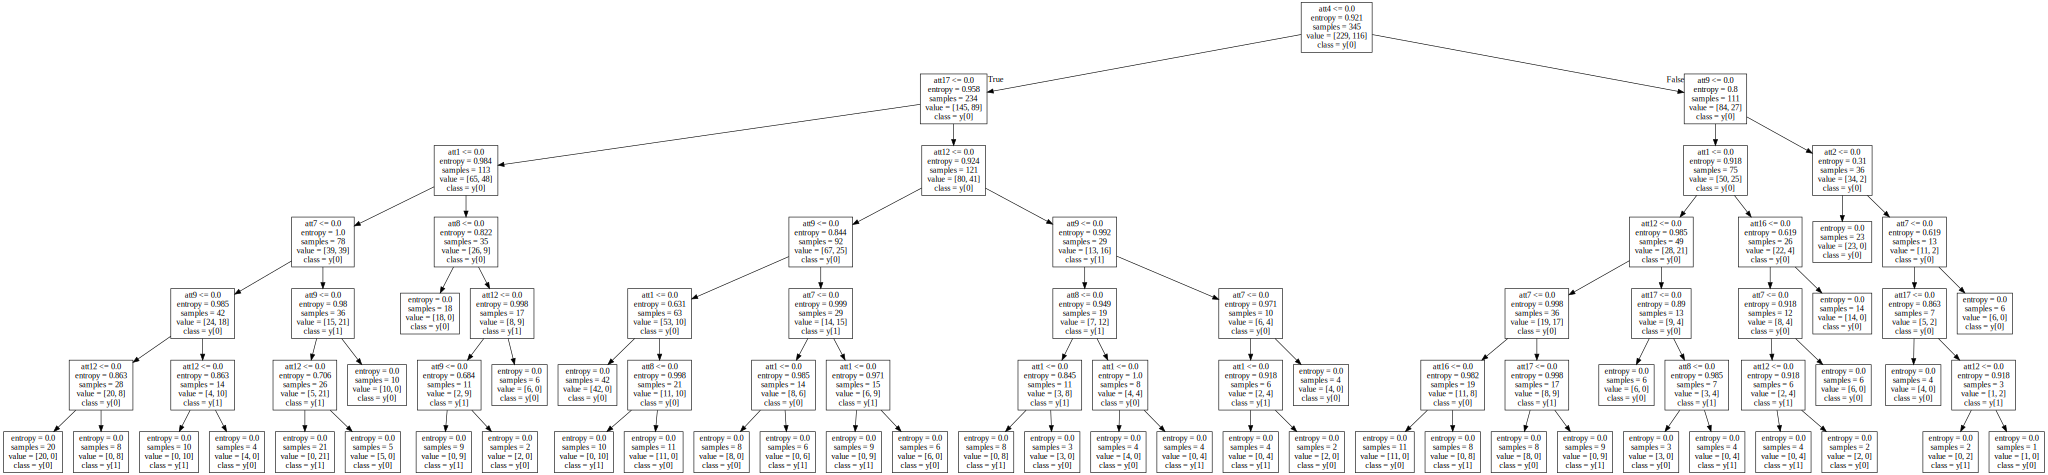

In [20]:
graph